In [1]:
# Suppressing warnings
import warnings
warnings.filterwarnings(action = "ignore")

import quadratic2SLS as q2sls
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Plotting preferences
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [10]:
np.random.seed(49067)

## Data Generation ##
n = 1500
n_bootstraps = 3000

## DGP ##
# X1 is endogenous because we are going to leave X4 out as an ommitted var and cov(X1, X4) =/= 0
# Z's are the instruments we will use for X1
var_names = ['X1', 'X2', 'X3', 'X4', 'Z1', 'Z2']
means = [3, -1.5, 1.1, 2.3, -1, 3]
cov1 = [[1, 0, 0, 0.75, 0.25, 0.4],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0.75, 0, 0, 1, 0, 0],
       [0.25, 0, 0, 0, 1, 0],
       [0.4, 0, 0, 0, 0, 1]]
cov = [[1, 0, 0, 0.75, 0.8, 0.4],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0.75, 0, 0, 1, 0, 0],
       [0.8, 0, 0, 0, 1, 0],
       [0.4, 0, 0, 0, 0, 1]]

X1, X2, X3, X4, Z1, Z2 = np.random.multivariate_normal(means, cov, n).T

# Normal, mean zero errors
epsilon = np.random.normal(0, 1, n)

# True model:
Y = 1.5 + 2.5*X1 - 0.7*(X1)**2 + 2*X2 + 3*X3 + 2*X4 + epsilon

## Constructing the data sets ##
# Note: we leave out X4 as the omitted variable from which endogeneity is arising
exogenous = pd.DataFrame({'X2' : X2, 'X3' : X3})
exogenous = sm.add_constant(exogenous)
endogenous = pd.DataFrame({'X1' : X1})
instruments = pd.DataFrame({'Z1' : Z1, 'Z2' : Z2})
Y = pd.DataFrame({'Y' : Y})

## Estimating the models ##
model1 = q2sls.Quadratic2SLS(Y, exogenous, endogenous, instruments)
result1 = model1.fit(cov_type='Bootstrap', n_iter = n_bootstraps)

100%|██████████| 3000/3000 [00:26<00:00, 111.31it/s]


In [11]:
coeff_estms1 = pd.DataFrame([result1.beta_hat_boots.mean(axis=0), result1.result2.params]).transpose()
coeff_estms1.columns = ['Bootstrapped', 'Full_Sample']
coeff_estms1['True_Coeffs'] = [1.5, 2.5, -0.7, 2, 3]
coeff_estms1

,Bootstrapped,Full_Sample,True_Coeffs
const,4.813512,5.491474,1.5
endog_hat,3.239003,2.722634,2.5
endog_sq_hat,-0.801140,-0.714794,-0.7
X2,1.939791,1.936491,2.0
X3,3.018807,3.020103,3.0


In [12]:
coeff_estms1 = pd.DataFrame([result1.beta_hat_boots.mean(axis=0), result1.result2.params]).transpose()
coeff_estms1.columns = ['Bootstrapped', 'Full_Sample']
coeff_estms1['True_Coeffs'] = [1.5, 2.5, -0.7, 2, 3]
coeff_estms1

,Bootstrapped,Full_Sample,True_Coeffs
const,4.813512,5.491474,1.5
endog_hat,3.239003,2.722634,2.5
endog_sq_hat,-0.801140,-0.714794,-0.7
X2,1.939791,1.936491,2.0
X3,3.018807,3.020103,3.0


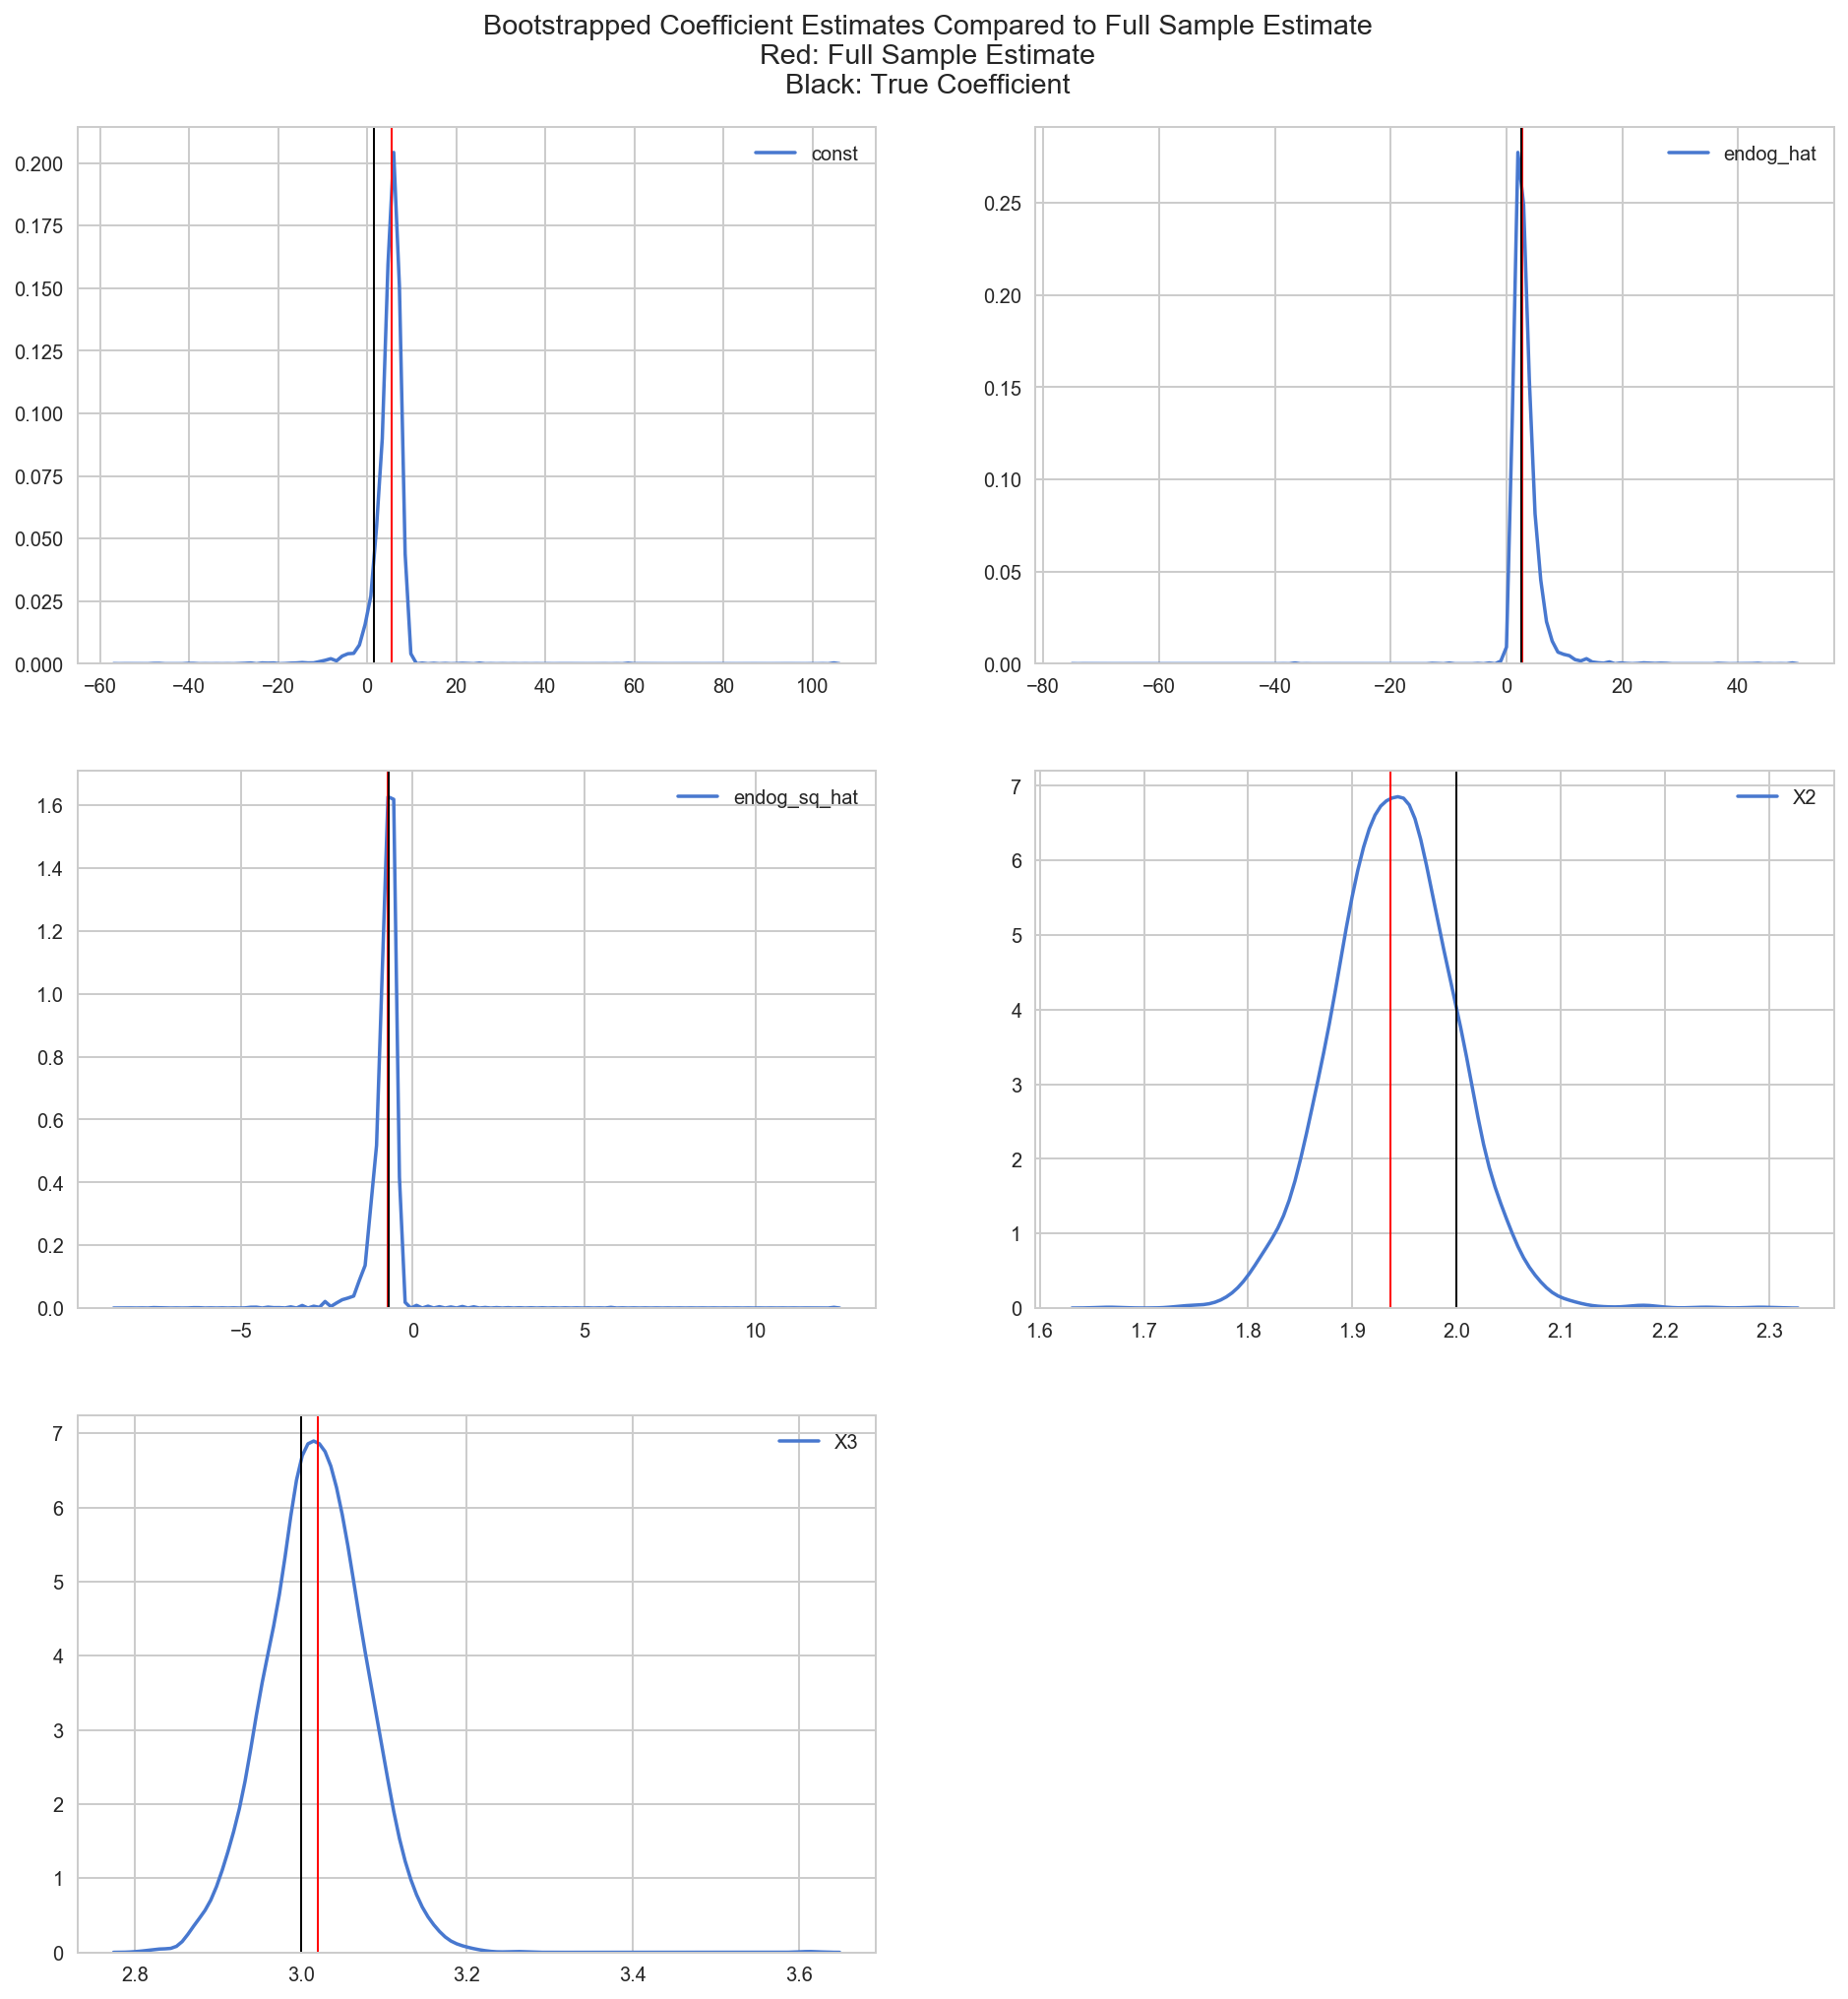

In [13]:
# Creating distribution plots
plt.figure(figsize=(16, 16))
sns.set(style="whitegrid", palette="muted", color_codes=True)

plt.subplots_adjust(top=0.93)
plt.suptitle('Bootstrapped Coefficient Estimates Compared to Full Sample Estimate\nRed: Full Sample Estimate\nBlack: True Coefficient')
#plt.title('Red: Full Sample Estimate\nBlack: True Coefficient')

sns.despine()
for column_index, column in enumerate(result1.X_hat.columns.values.tolist()):
    plt.subplot(3, 2, column_index + 1)
    sns.kdeplot(result1.beta_hat_boots[column])
    plt.plot([result1.result2.params[column_index], result1.result2.params[column_index]], 
             [0, 500], 
             linewidth=1,
            color = 'red')
    plt.plot([coeff_estms1['True_Coeffs'][column_index], coeff_estms1['True_Coeffs'][column_index]], 
             [0, 500], 
             linewidth=1,
            color = 'black')

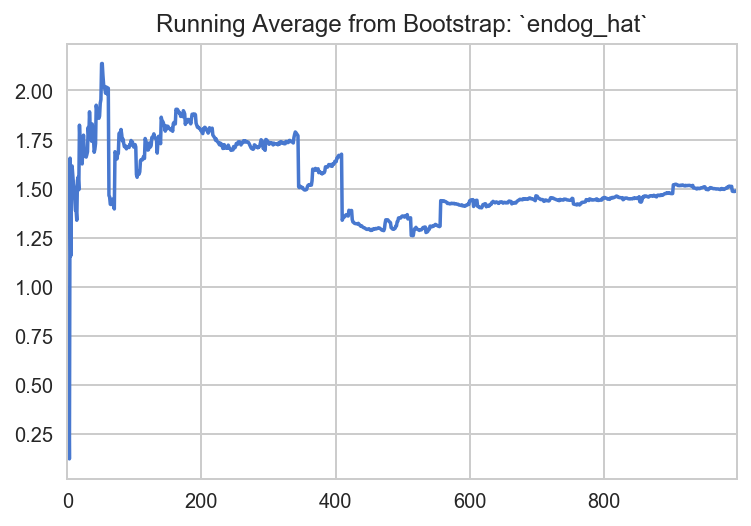

In [9]:
import seaborn as sns
cumsum_beta_hat_boots = np.cumsum(result1.beta_hat_boots['endog_hat'])
plt.title('Running Average from Bootstrap: `endog_hat`')
sns.tsplot(cumsum_beta_hat_boots/np.arange(n_bootstraps));

In [74]:
np.random.seed(1234)
n = 1500
n_bootstraps = 3000

X2 = np.random.binomial(1, 0.7, n)
X3 = np.random.normal(2, 1, n)
X5 = np.random.normal(1, 0.5, n)
X4 = np.random.normal(1.5, 2, n)
Z1 = np.random.normal(2, 1, n)
Z2 = np.random.binomial(1, 0.4, n)
Z3 = np.random.normal(1, 0.75, n)
Z4 = np.random.binomial(1, 0.6, n)
epsilon = np.random.normal(0, 1, n)
eta = np.random.normal(0, 1, n)

# Model 1:
#X1 = 1 + 2*X3 - 3*X4 + 2*Z1 + 2*Z2 - Z3 + 3*Z4 + eta
X1 = np.random.normal()
Y = 0.7 + 1.2*X1 - 0.1*(X1)**2 + 0.3*X2 + 0.2*X3 + 0.4*X4 + 0.3*X5 + epsilon

# Constructing the data sets
exogenous = pd.DataFrame({'X2' : X2, 'X3' : X3, 'X5' : X5})
exogenous = sm.add_constant(exogenous)
endog1 = pd.DataFrame({'X1' : X1})
instruments3 = pd.DataFrame({'Z1' : Z1, 'Z2' : Z2, 'Z3' : Z3, 'Z4' : Z4})
Y = pd.DataFrame({'Y' : Y})

## Estimating the models
# model 1:
model = q2sls.Quadratic2SLS(Y, exogenous, endog1, instruments3)
result = model.fit(cov_type='Bootstrap', n_iter = n_bootstraps)

coeff_estms = pd.DataFrame([result.beta_hat_boots.mean(axis=0), result.result2.params]).transpose()
coeff_estms.columns = ['Bootstrapped', 'Full_Sample']
coeff_estms['True_Coeffs'] = [0.7, 1.2, -0.1, 0.3, 0.2, 0.3]
coeff_estms

100%|██████████| 10000/10000 [02:23<00:00, 69.50it/s]


,Bootstrapped,Full_Sample,True_Coeffs
const,1.367688,1.330029,0.7
endog_hat,1.235204,1.227690,1.2
endog_sq_hat,-0.103875,-0.102915,-0.1
X2,0.244731,0.249939,0.3
X3,0.234452,0.236469,0.2
X5,0.344678,0.341198,0.3


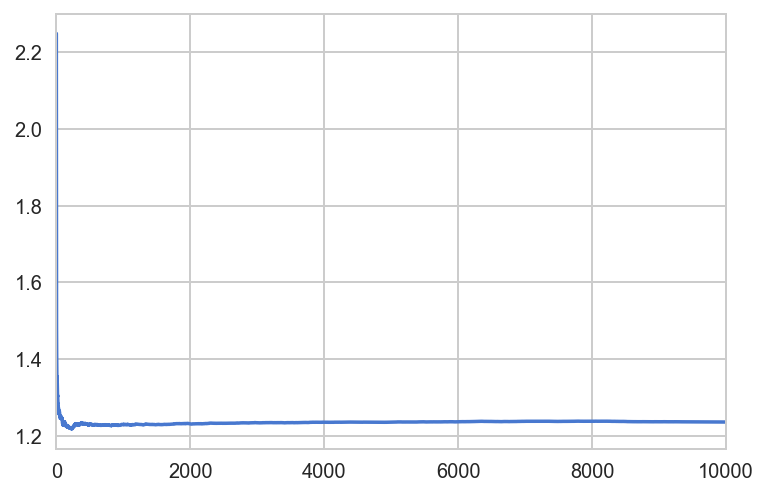

In [76]:
cumsum_beta_hat_boots = np.cumsum(result.beta_hat_boots['endog_hat'])
plt.suptitle
sns.tsplot(cumsum_beta_hat_boots/np.arange(n_bootstraps));

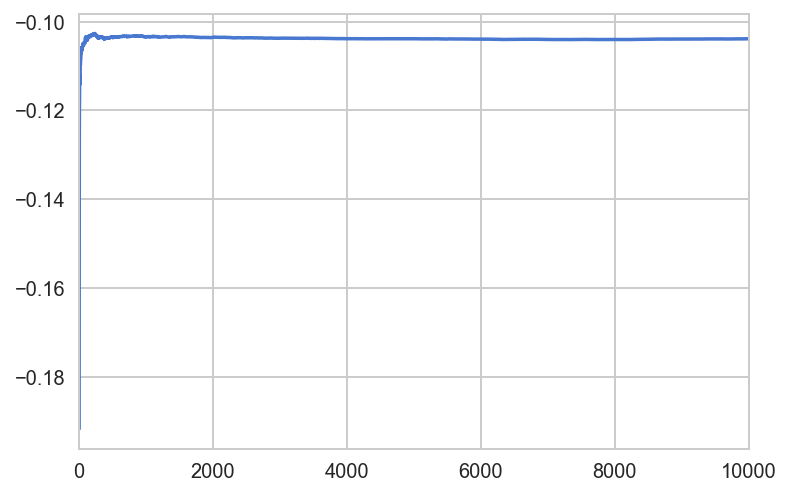

In [77]:
cumsum_beta_hat_boots = np.cumsum(result.beta_hat_boots['endog_sq_hat'])
plt.suptitle
sns.tsplot(cumsum_beta_hat_boots/np.arange(n_bootstraps));

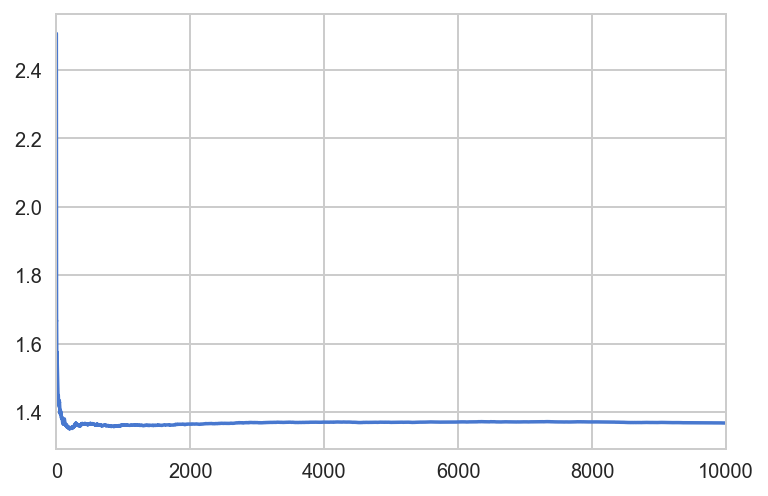

In [78]:
cumsum_beta_hat_boots = np.cumsum(result.beta_hat_boots['const'])
plt.suptitle
sns.tsplot(cumsum_beta_hat_boots/np.arange(n_bootstraps));

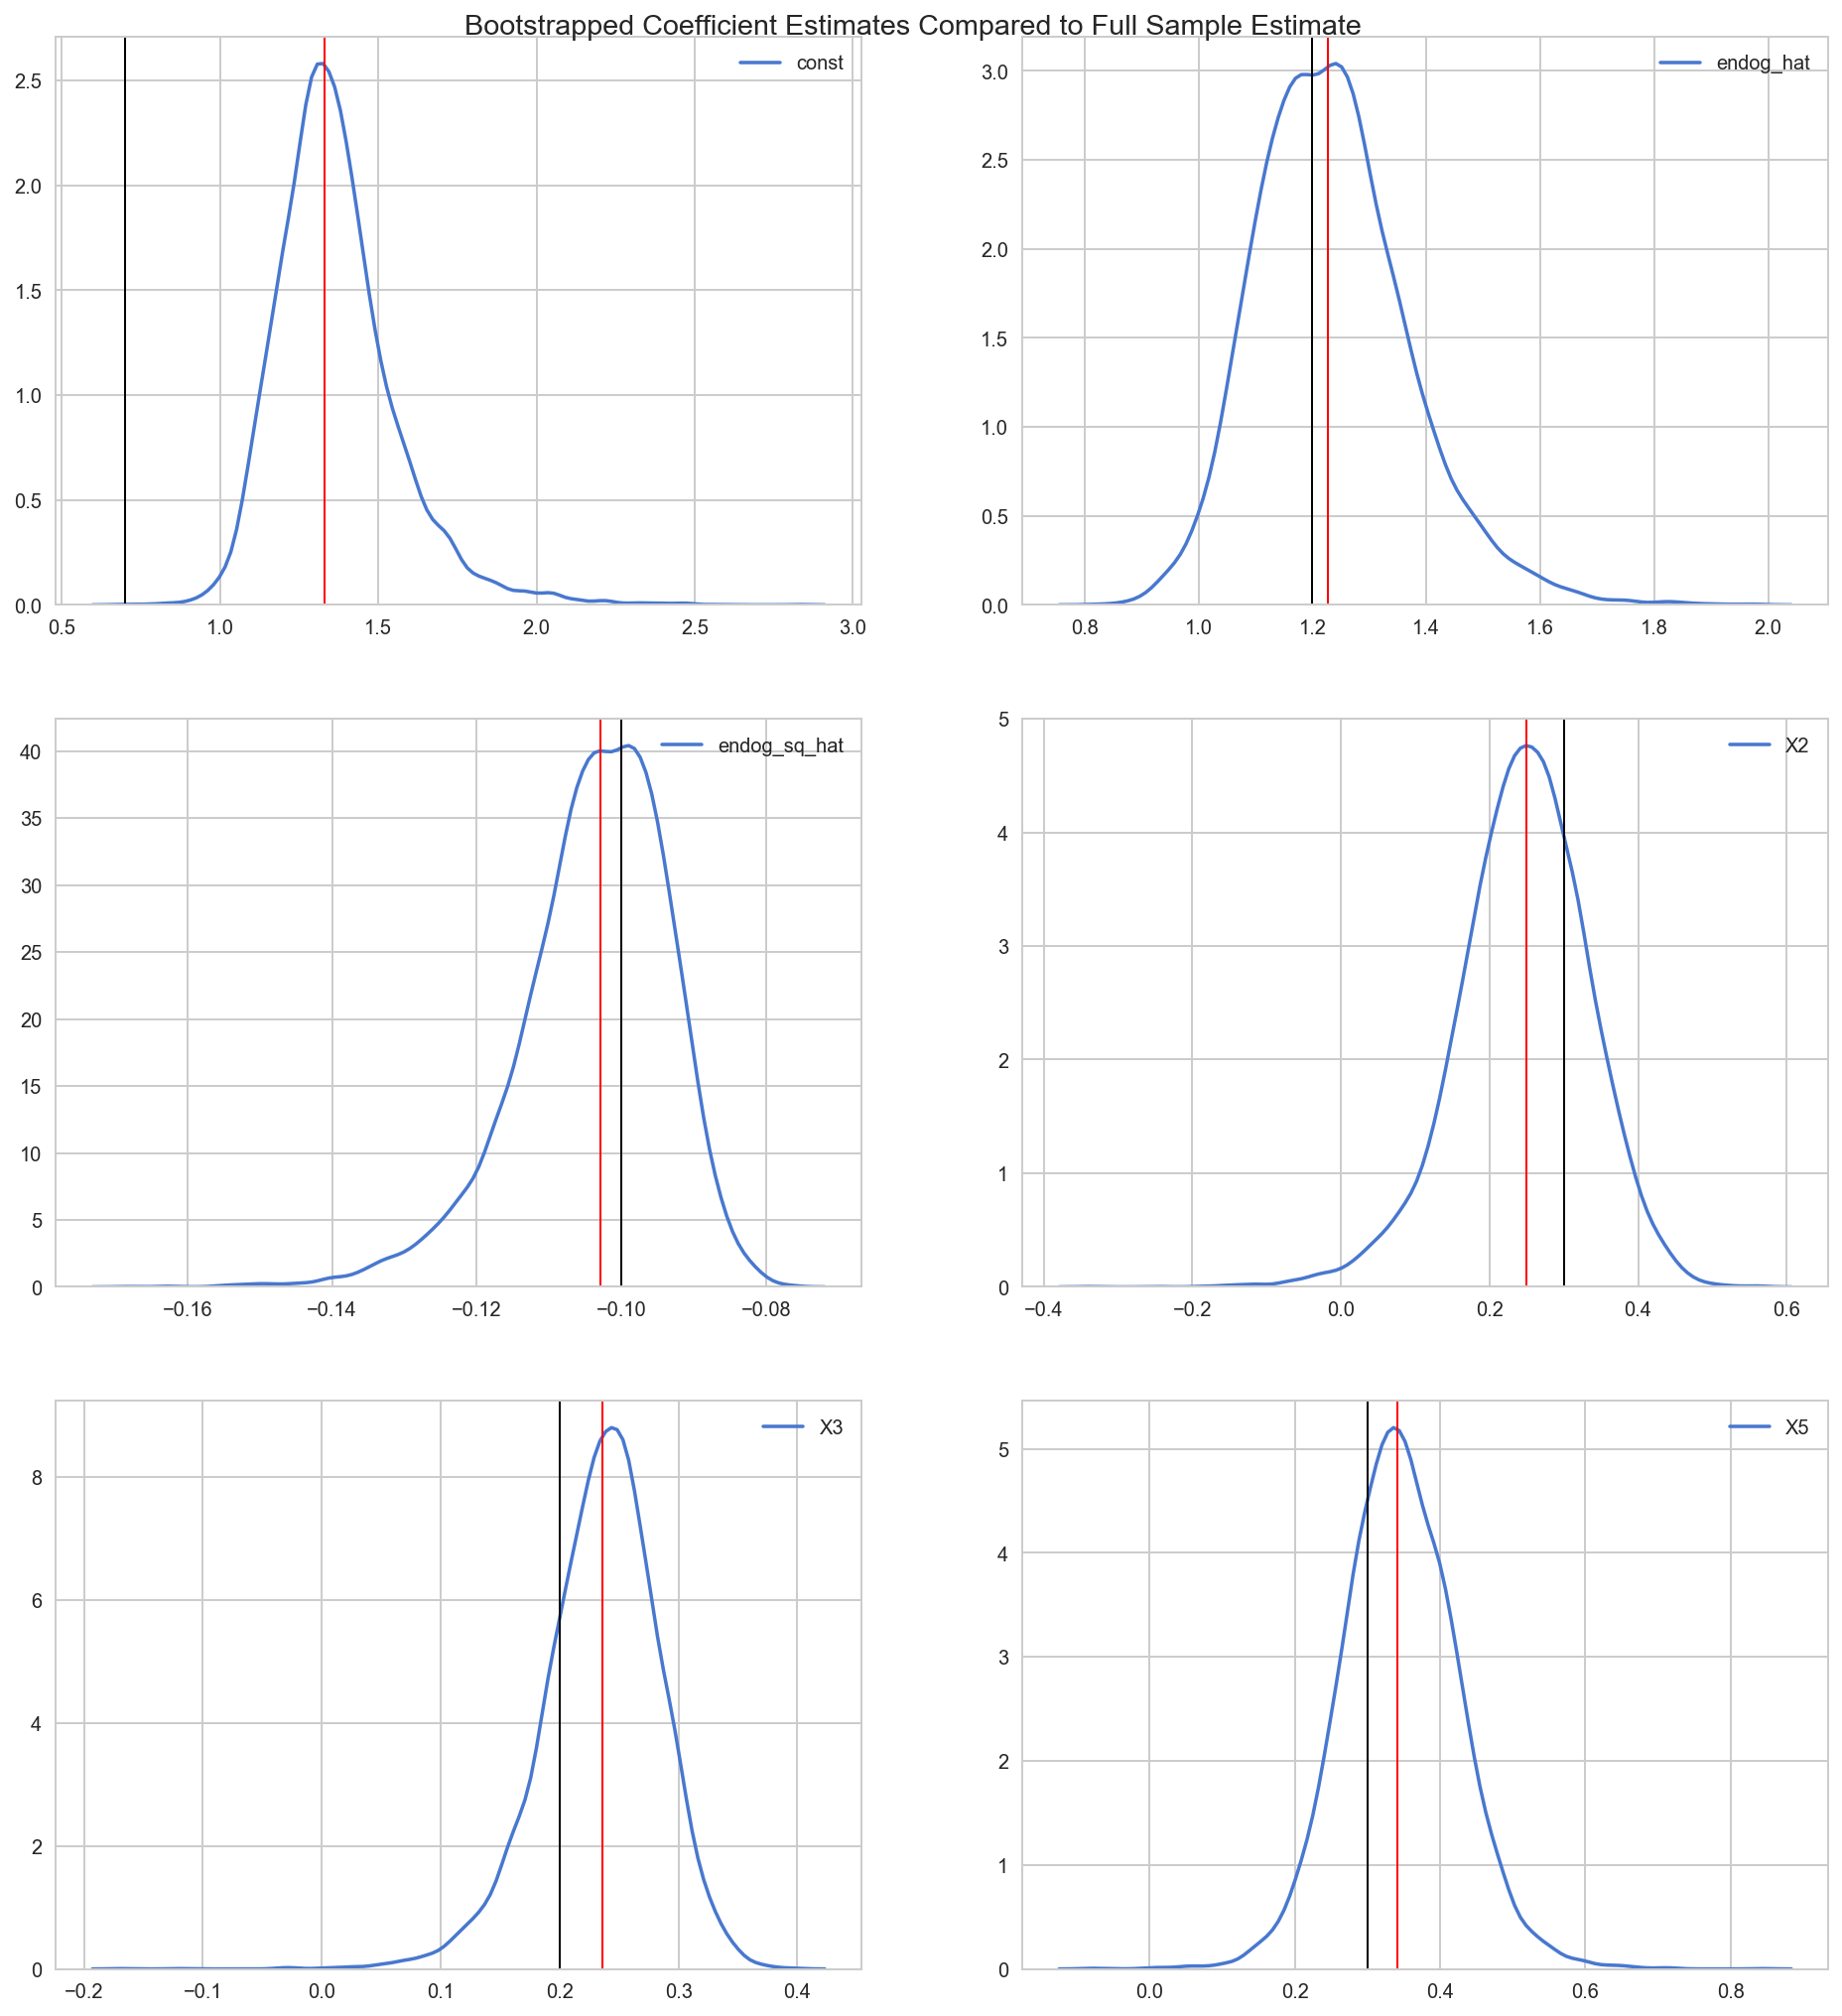

In [80]:
plt.figure(figsize=(16, 16))
sns.set(style="whitegrid", palette="muted", color_codes=True)

plt.subplots_adjust(top=0.97)
plt.suptitle('Bootstrapped Coefficient Estimates Compared to Full Sample Estimate')

sns.despine()
for column_index, column in enumerate(result.X_hat.columns.values.tolist()):
    plt.subplot(3, 2, column_index + 1)
    sns.kdeplot(result.beta_hat_boots[column])
    plt.plot([result.result2.params[column_index], result.result2.params[column_index]], 
             [0, 500], 
             linewidth=1,
            color = 'red')
    plt.plot([coeff_estms['True_Coeffs'][column_index], coeff_estms['True_Coeffs'][column_index]], 
             [0, 500], 
             linewidth=1,
            color = 'black')